In [2]:
import pandas as pd
import numpy as np

In [3]:
pip install sweetviz

In [4]:
import sweetviz as sv

# delivery_time_LR

In [5]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\assignments\4 eda linear reg\delivery_time.csv")

In [6]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(21, 2)

In [9]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
df[df.duplicated()].shape

(0, 2)

In [12]:
df[df.duplicated()]

,Delivery Time,Sorting Time


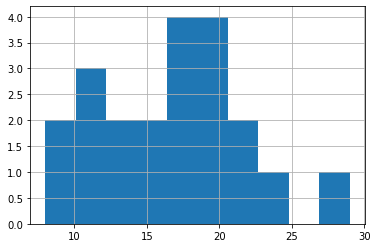

In [13]:
df['Delivery Time'].hist()

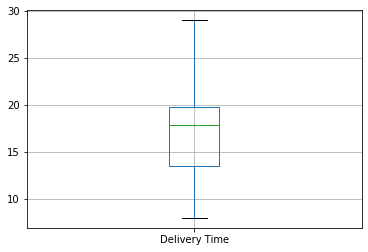

In [14]:
df.boxplot(column=['Delivery Time'])

In [15]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [16]:
df[df.isnull().any(axis=1)]

,Delivery Time,Sorting Time


,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


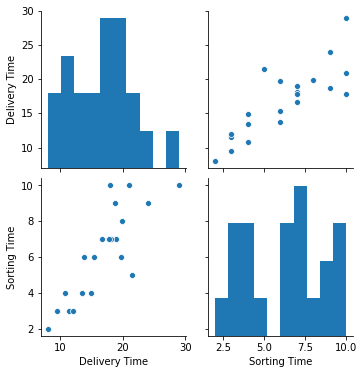

In [17]:
import seaborn as sns
sns.pairplot(df)
df.corr()

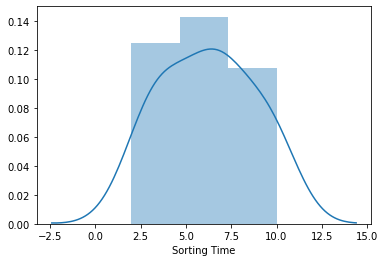

In [18]:
sns.distplot(df['Sorting Time'])

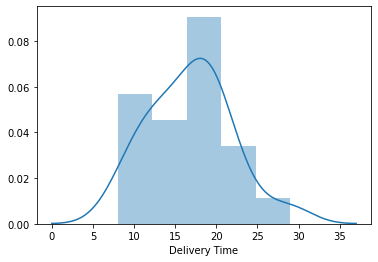

In [19]:
sns.distplot(df['Delivery Time'])

In [20]:
import statsmodels.formula.api as smf

In [38]:
model=smf.ols("df['Delivery Time']~df['Sorting Time']",data=df).fit()

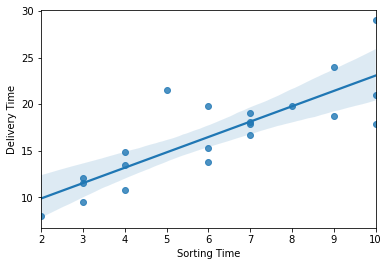

In [22]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=df)

In [23]:
model.params

Intercept             6.582734
df['Sorting Time']    1.649020
dtype: float64

In [24]:
print(model.tvalues,'\n',model.pvalues)

Intercept             3.823349
df['Sorting Time']    6.387447
dtype: float64 
 Intercept             0.001147
df['Sorting Time']    0.000004
dtype: float64


In [25]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     df['Delivery Time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Wed, 09 Dec 2020   Prob (F-statistic):           3.98e-06
Time:                         13:06:22   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5827      1.722      3.823      0.001       2.979      10.186
df['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
df['Sorting Time'],1.108673,2.189367


In [41]:
pred = model.predict(df)

In [42]:
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64